# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


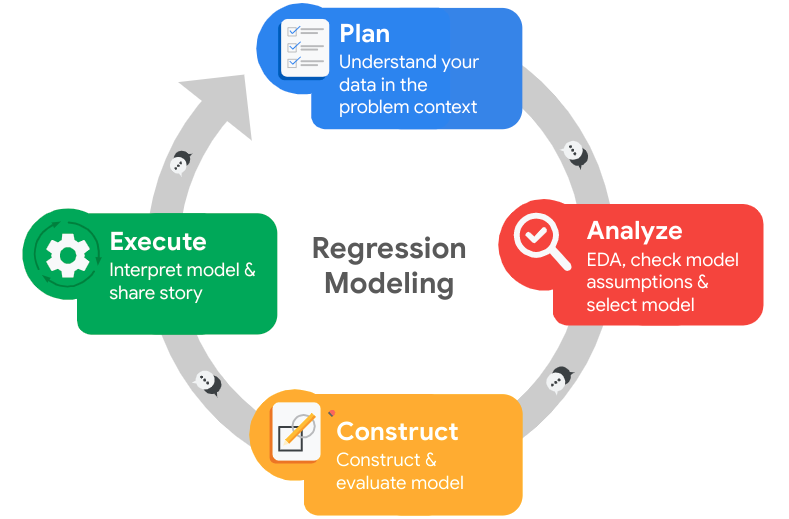

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import warnings

# Suppress specific warning
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in cast")

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
ds = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
ds.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
ds.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
ds.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
ds = ds.rename(columns = {'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})


# Display all column names after the update
ds.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
ds.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
ds.duplicated().sum()


np.int64(3008)

In [9]:
# Inspect some rows containing duplicates as needed
ds[ds.duplicated()]


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
ds1 = ds.drop_duplicates(keep = 'first')


# Display first few rows of new dataframe as needed
ds1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

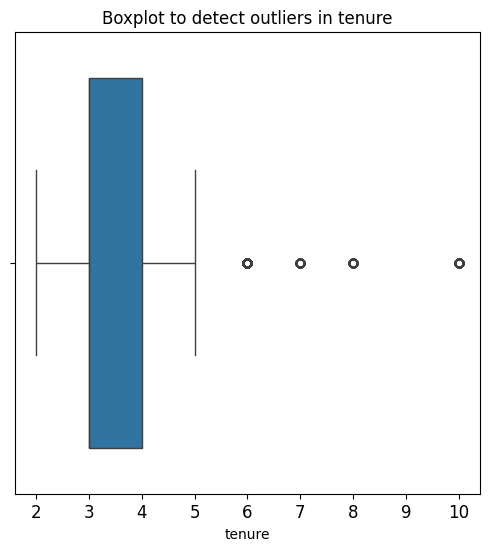

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers in tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=ds1['tenure'])
plt.show()

In [12]:
# Determine the number of rows containing outliers 
### YOUR CODE HERE ###

# Compute the 25th percentile value in `tenure`
percentile25 = ds1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = ds1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = ds1[(ds1['tenure'] > upper_limit) | (ds1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(ds1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(ds1['left'].value_counts(normalize=True))


left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Box Plot Analysis of Satisfaction Level by Employment Status

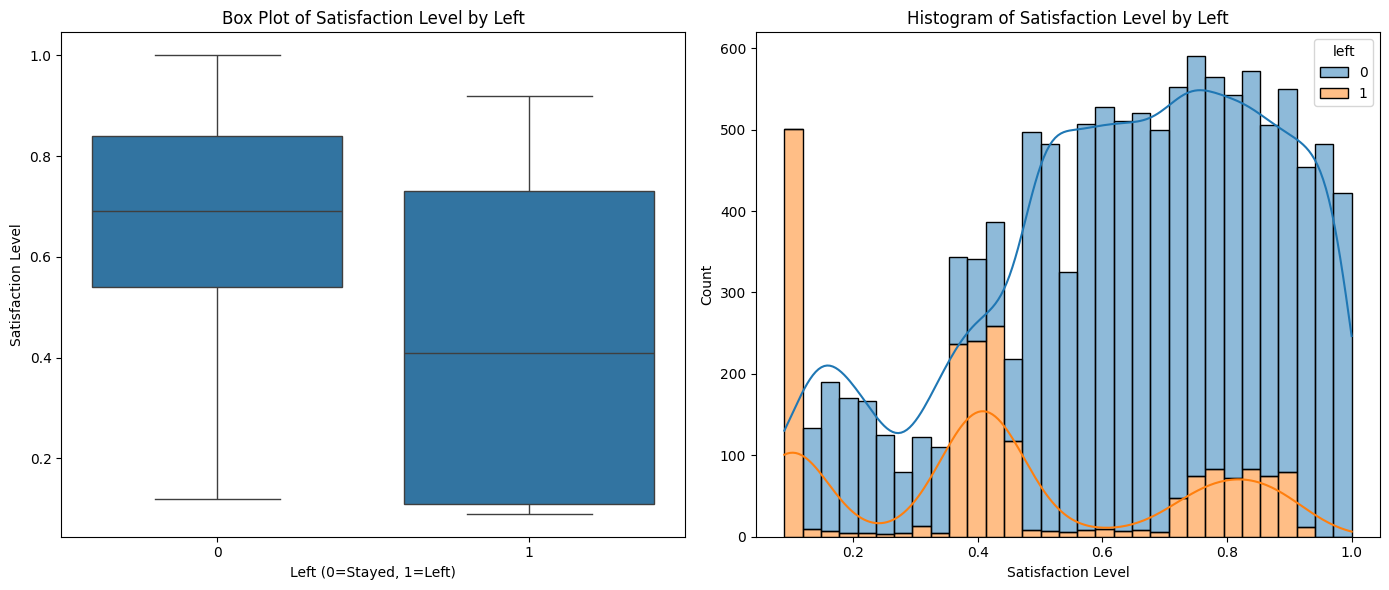

In [14]:
# Create a plot as needed
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Box Plot
sns.boxplot(x='left', y='satisfaction_level', data=ds1, ax=axs[0])
axs[0].set_title('Box Plot of Satisfaction Level by Left')
axs[0].set_xlabel('Left (0=Stayed, 1=Left)')
axs[0].set_ylabel('Satisfaction Level')

# Histogram with KDE
sns.histplot(data=ds1, x='satisfaction_level', hue='left', kde=True, multiple='stack', ax=axs[1])
axs[1].set_title('Histogram of Satisfaction Level by Left')
axs[1].set_xlabel('Satisfaction Level')
axs[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


* A significant portion of employees reported low satisfaction levels, with nearly half of those who remained and over half of those who left falling below the midpoint.
* Conversely, the majority of employees who stayed indicated satisfaction levels exceeding 0.5.
  
These findings suggest underlying factors contributing to dissatisfaction, warranting further investigation.



####  Scatter Plot Analysis of Average Monthly Hours vs. Satisfaction Level
Let's analyze employee satisfaction with their working hours and its impact on retention rates.

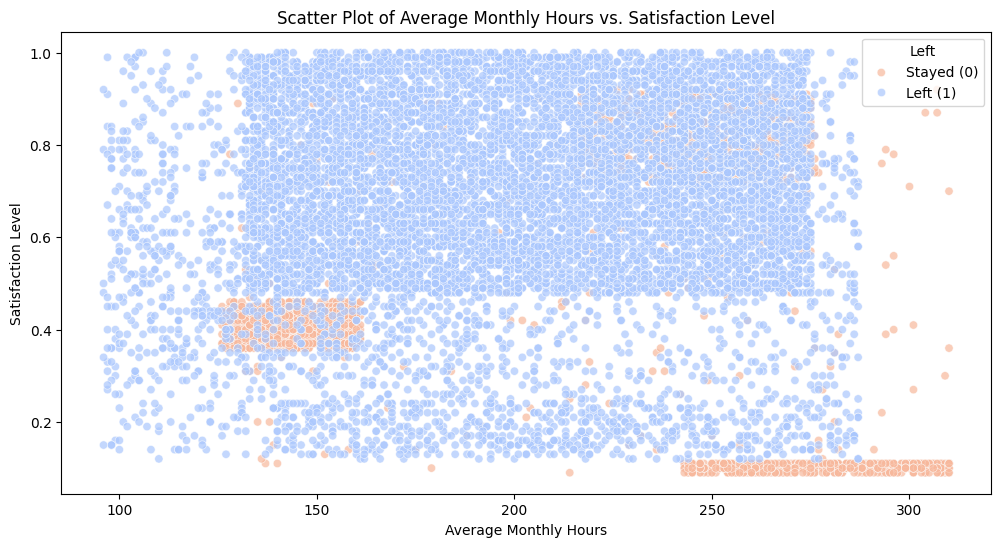

In [15]:
# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='average_monthly_hours', y='satisfaction_level', hue='left', data=ds1, palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Average Monthly Hours vs. Satisfaction Level')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.legend(title='Left', labels=['Stayed (0)', 'Left (1)'])
plt.show()

* A significant number of employees report satisfaction levels above 0.5 while working over 130 hours per month, indicating that many choose to stay despite longer hours.
* Employees who have left can be categorized into two main groups:
    * Those working extremely long hours with low satisfaction.
    * Those who are relatively satisfied but work shorter hours.
<br/>

These latter employees may have resigned due to pressure for longer hours or were let go. Interestingly, many employees seem willing to work longer hours, potentially due to incentives or fear of job loss.

#### Scatter Plot Analysis of Last Evaluation vs. Average Monthly Hours
Now, let's create a visualization comparing last evaluations with average monthly hours to determine if evaluations serve as an incentive.

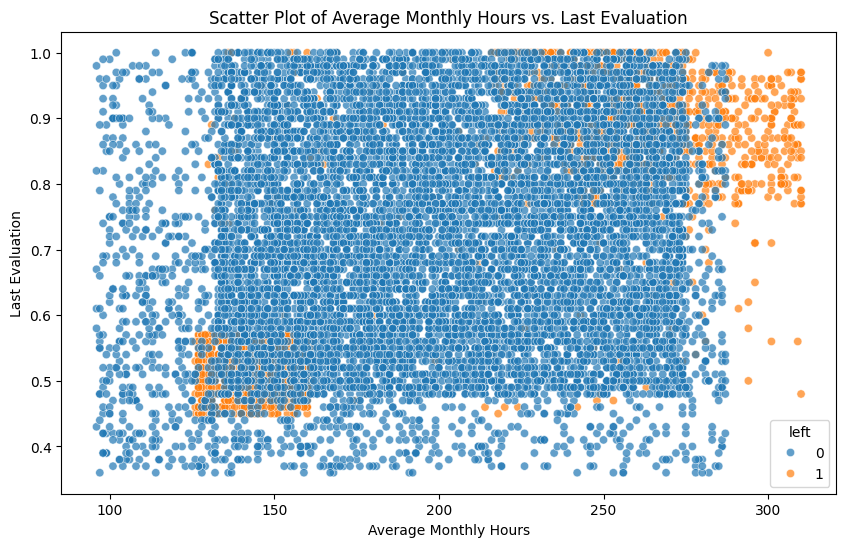

In [16]:

# Create the plot

plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.7)

# Customize the plot
plt.title('Scatter Plot of Average Monthly Hours vs. Last Evaluation')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Last Evaluation')
plt.show()

* A significant number of employees who received good evaluation scores (around 0.5 and above) tend to work long hours (approximately 150 hours or more).
* Similar to the previous analysis, employees who have left can be classified into two categories:
    * Those working long hours with positive evaluations.
    * Those working shorter hours with poor evaluations.

The former group may have reached their breaking point and resigned, while the latter likely struggled to meet expectations and were subsequently terminated. This suggests that average monthly hours could be a key factor in determining employee retention.



#### Box Plot Analysis of Average Monthly Hours by Number of Projects and Employment Status
Next, let's examine how average monthly hours, categorized by the number of projects, correlate with employee turnover status.

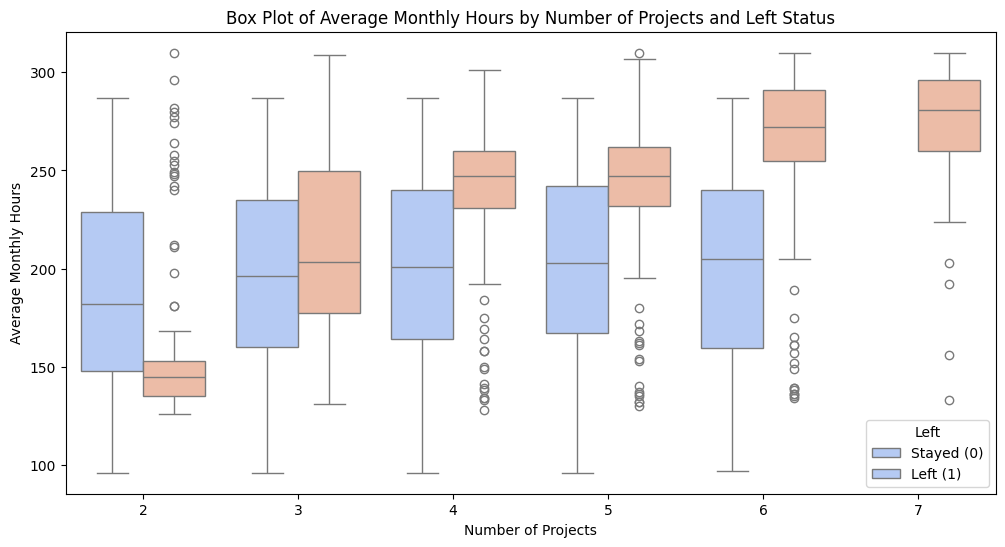

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='number_project', y='average_monthly_hours', hue='left', data=ds1, palette='coolwarm')
plt.title('Box Plot of Average Monthly Hours by Number of Projects and Left Status')
plt.xlabel('Number of Projects')
plt.ylabel('Average Monthly Hours')
plt.legend(title='Left', labels=['Stayed (0)', 'Left (1)'])
plt.show()

* As the number of projects employees are involved in increases, their average monthly hours also rise, which aligns with expectations.
* Employees who have left can be categorized into two groups:
    * A minority working on two projects, contributing fewer hours than those who stayed. This group may have been terminated or chose to leave due to pressure for increased hours.
    * A majority working on more than two projects, logging significantly more hours than their counterparts who remained.


#### Let's create a visualization to show the proportion of employees who stayed versus those who left by department.

Number of employees ineach department

In [18]:
ds1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

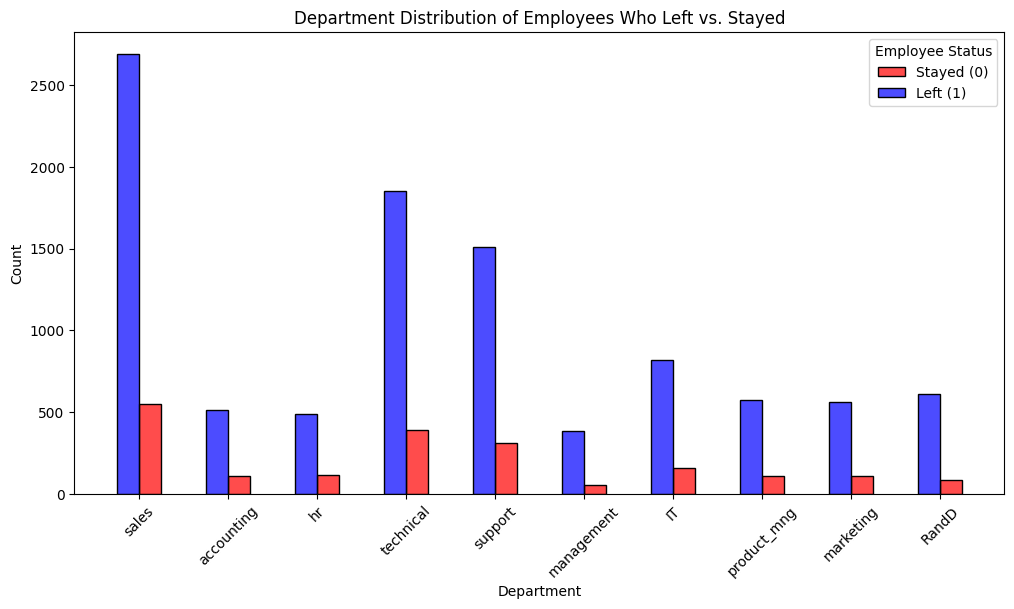

In [19]:
# Create the plot
# Create the plot
plt.figure(figsize=(12, 6))

# Plot histogram with dodge option and specific hue order
sns.histplot(
    data=ds1,
    x='department',
    hue='left',
    hue_order=[0, 1],
    multiple='dodge',
    palette={0: 'blue', 1: 'red'},
    discrete=True,
    alpha=0.7,shrink=0.5
)

# Customize the plot
plt.title('Department Distribution of Employees Who Left vs. Stayed')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Employee Status', labels=['Stayed (0)', 'Left (1)'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

* The analysis shows no clear correlation between employee departures and specific departments.

#### Let's visualize the count of promotions based on employee status.

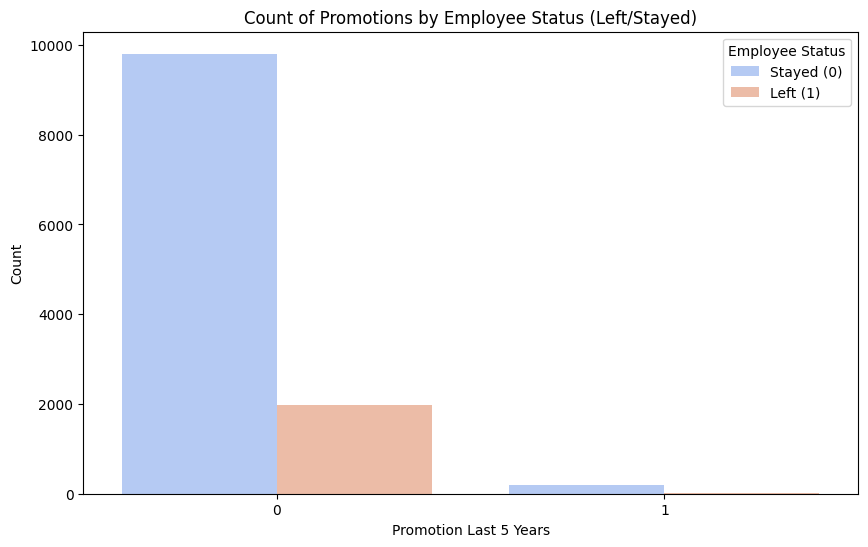

In [20]:
# Create the plot
plt.figure(figsize=(10, 6))

# Grouped bar plot
sns.countplot(data=ds1, x='promotion_last_5years', hue='left', palette='coolwarm')

# Customize the plot
plt.title('Count of Promotions by Employee Status (Left/Stayed)')
plt.xlabel('Promotion Last 5 Years')
plt.ylabel('Count')
plt.legend(title='Employee Status', labels=['Stayed (0)', 'Left (1)'])
plt.show()

* The number of promotions is quite limited across both employee statuses.

#### Let's create a visualization to assess whether salary influences employees' decisions to stay or leave.

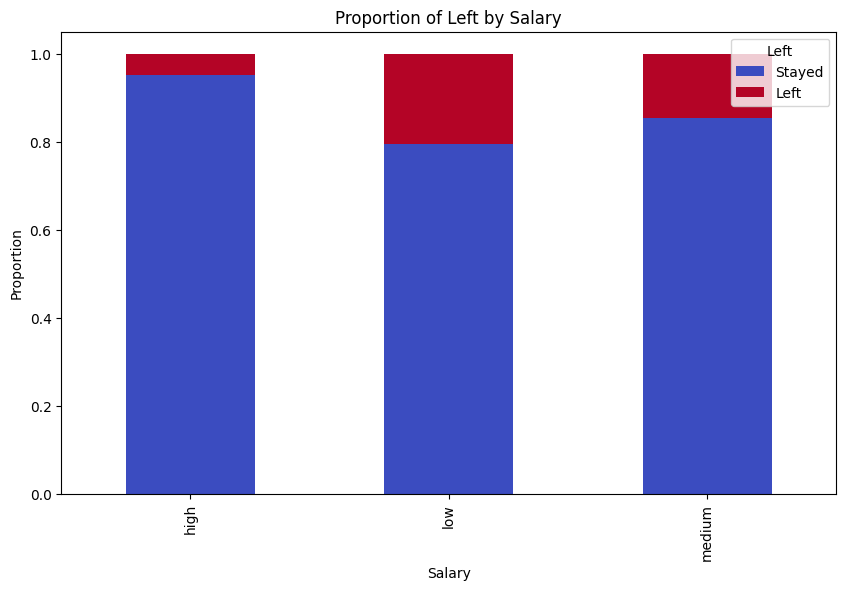

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
# Calculate proportions
salary_counts = ds1.groupby(['salary', 'left']).size().unstack().fillna(0)
salary_proportions = salary_counts.div(salary_counts.sum(axis=1), axis=0)

# Plot stacked bar plot
salary_proportions.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title('Proportion of Left by Salary')
plt.xlabel('Salary')
plt.ylabel('Proportion')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

* There appears to be a modest correlation between salary levels and the likelihood of employees leaving.

#### Finally, let's analyze the data for strong correlations between the various variables.

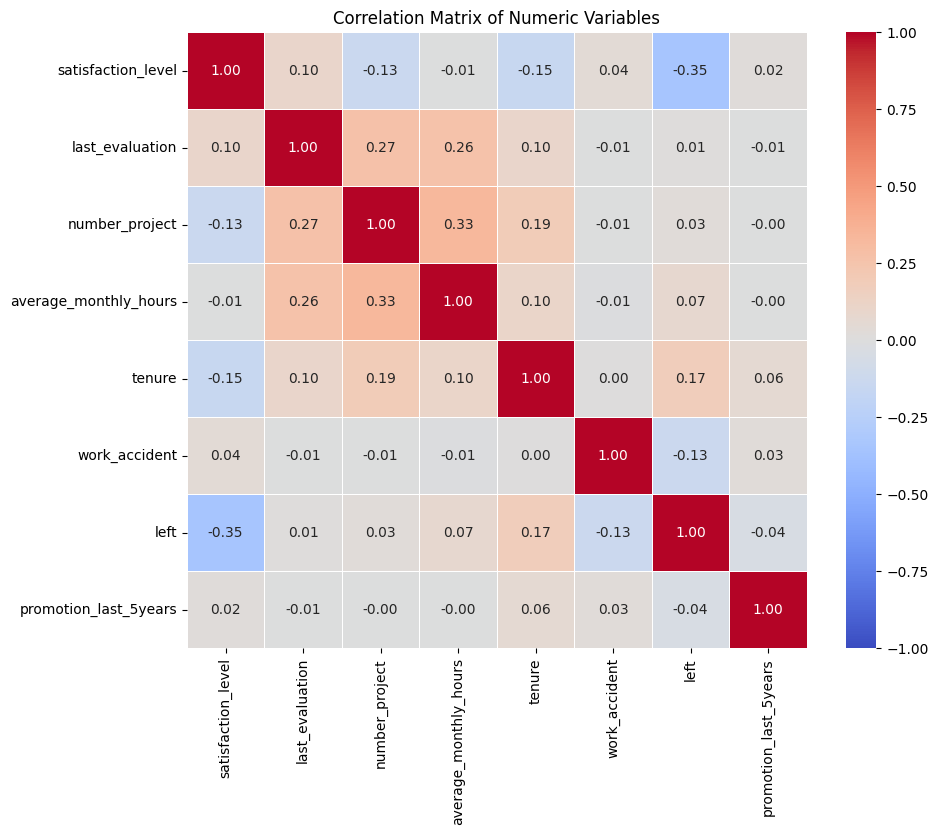

In [22]:
# Remove non-numeric columns
numeric_df = ds1.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

The correlation heatmap indicates that the number of projects, monthly hours, and evaluation scores are positively correlated with one another. In contrast, employee turnover is negatively correlated with satisfaction levels.

### Insights

The company appears to have a tradition of subjecting employees to long working hours, which is reflected in their evaluation patterns. Many employees with high evaluation scores are working significantly more than the ideal monthly hours. While some manage to cope with this, others struggle. Furthermore, the slow pace of promotions can be discouraging for many employees.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

My objective is to predict employee turnover, which is a categorical outcome variable. This task involves binary classification, as the outcome variable "left" can take on two values: 1 (indicating the employee has left) or 0 (indicating the employee has not left).

### Identify the types of models most appropriate for this task.

Since the variable I want to predict—employee turnover—is categorical, I could either develop a Logistic Regression model or utilize a Tree-based Machine Learning model.
I will assess the performance of two tree-based machine learning models, Random Forest and XGBoost, and select the best performer based on a designated evaluation metric.

Tree-based modeling is robust to outliers and does not require strict adherence to assumptions, making it a flexible choice for various datasets.

### Modeling Approach A: Random Forest Model

This approach covers implementation of Random Forest.

Before splitting the data, we need to encode the non-numeric variables. There are two: **department** and **salary**.

- **Department** is a categorical variable, so we will create dummy variables for modeling.
  
- **Salary** is also categorical, but it is ordinal. Given the inherent hierarchy of the categories, we should convert this variable to numerical values ranging from 0 to 2, rather than using dummy encoding.

In [23]:
### YOUR CODE HERE ###

# Copy the dataframe
ds_enc = ds1.copy()

# Encode the `salary` column as an ordinal numeric category
ds_enc['salary'] = (
    ds_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
ds_enc = pd.get_dummies(ds_enc, drop_first=False)

# Display the new dataframe
ds_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


Select the features to include in your model by considering which variables will effectively aid in predicting the outcome variable, **left**. Focusing on features that have a strong relationship with the target and can provide meaningful insights for my analysis.

In [24]:
# Isolate the outcome variable
y = ds_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [25]:
# Select the features
X = ds_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False


Split the data into training set and testing set.

In [26]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

Construct a Random Forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [27]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
# rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')
rf1 = GridSearchCV(estimator=rf, param_grid=cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the random forest model to the training data.

In [28]:
# %%time
# rf1.fit(X_train, y_train)

In [29]:
path = 'C:\\Users\\charlie\\Desktop\\jupyter\\cousera\\'


Define functions to pickle the model and read in the model.

In [30]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [31]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

Use the functions defined above to save the model in a pickle file and then read it in.

In [32]:
# Write pickle
# write_pickle(path, rf1, 'hr_rf1')

In [33]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

Identify the best AUC score achieved by the random forest model on the training set.

In [34]:
rf1.best_score_

np.float64(0.9804250949807172)

Identify the optimal values for the parameters of the random forest model.

In [35]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

Next, you can write a function that will help you extract all the scores from the grid search. 

In [36]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

Collect the evaluation scores on the training set for random forest models.

In [37]:
# Get all CV scores
rf1_results = make_results('random forest', rf1, 'auc')
print(rf1_results)

           model  precision    recall        F1  accuracy       auc
0  random forest   0.950023  0.915614  0.932467  0.977983  0.980425


### Modeling Approach B: XGBoost
This approach covers implementation of XGBoost

Construct a XGBoost model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [38]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0) 

cv_params = {'max_depth': [4,5,6,7,8], 
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 125]
             }    

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
# rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')
xgb1 = GridSearchCV(estimator=xgb, param_grid=cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the random forest model to the training data.

In [39]:
# %%time
# xgb1.fit(X_train, y_train)

Save the model in a pickle file and then read it in.

In [40]:
# Write pickle
# write_pickle(path, xgb1, 'hr_xgb1')

In [41]:
# Read pickle
xgb1 = read_pickle(path, 'hr_xgb1')

Identify the best AUC score achieved by the XGBoost model on the training set.

In [42]:
xgb1.best_score_

np.float64(0.9858875934873096)

Identify the optimal values for the parameters of the XGBoost model.

In [43]:
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 75}

Collect the evaluation scores on the training set for XGBoost models.

In [44]:
xgb1_results = make_results('XGBoost', xgb1, 'auc')
print(rf1_results)
print(xgb1_results)

           model  precision    recall        F1  accuracy       auc
0  random forest   0.950023  0.915614  0.932467  0.977983  0.980425
     model  precision    recall        F1  accuracy       auc
0  XGBoost   0.981337  0.915611  0.947317  0.983098  0.985888


The evaluation scores for the XGBoost model surpass those of the Random Forest model, indicating that XGBoost generally outperforms Random Forest. 

Next, we will assess the final model using the test set.

Define a function that gets all the scores from a model's predictions.

In [45]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

Now use the best performing model to predict on the test set.

In [46]:
# Get predictions on test data
xgb1_test_scores = get_scores('xgb1 test', xgb1, X_test, y_test)
xgb1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,xgb1 test,0.980769,0.921687,0.950311,0.983989,0.959043


The test scores closely resemble the validation scores, which is a positive sign. This suggests that we have a robust model. Since this test set was exclusively used for this model, we can be more confident that its performance is indicative of how it will perform on new, unseen data.

Create a confusion matrix to visualize the model's predictive performance on the test set.

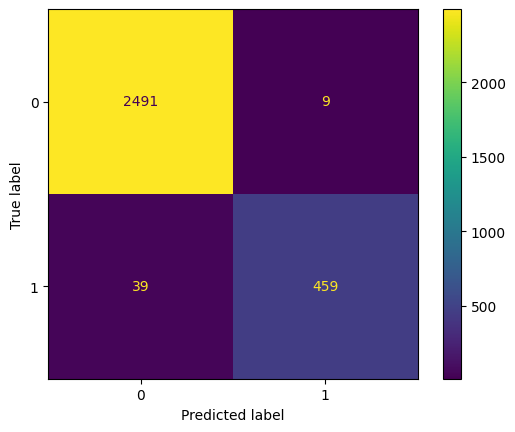

In [47]:
# Generate array of values for confusion matrix
preds = xgb1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=xgb1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb1.classes_)
disp.plot(values_format='');

The model predicts more false negatives than false positives; however, it remains a strong model overall.

#### XGBoost feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

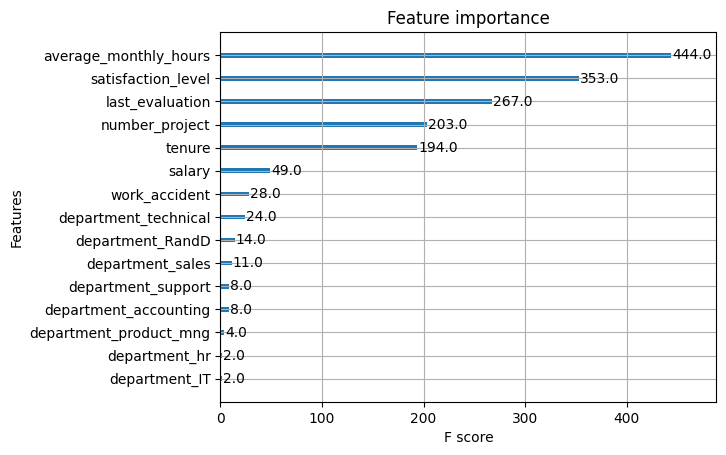

In [48]:
plot_importance(xgb1.best_estimator_)

The plot above indicates that in this XGBoost model, the most important features, in order of significance, are **average_monthly_hours**, **satisfaction_level**, **last_evaluation**, **number_of_projects**, **tenure**, and **salary**. These variables are the most effective in predicting the outcome variable, **left**.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The XGBoost model outperformed the Random Forest model, achieving an AUC score of 0.986 compared to 0.980 on the validation set. As a result, it was selected as the preferred model, demonstrating a precision of 98%, recall of 92%, F1-score of 95% (all weighted averages), and an accuracy of 98% on the test set.

### Conclusion, Recommendations, Next Steps

The visualizations and feature importance analysis indicate that employees are overworked and inadequately evaluated.

To enhance employee retention, the leadership team should consider the following recommendations:

Revise Evaluation Metrics: Relying on working hours for employee evaluations may pressure individuals to log excessive hours. Implement a more balanced and health-focused evaluation system.
Cultivate Company Culture: Engage in discussions to understand and improve the company's work culture.
Limit Project Load: Set a cap on the number of projects assigned to each employee.
Adjust Working Hours: Aim to reduce working hours to a healthier level and introduce incentives for those who cannot reduce their hours.
Investigate Discrepancies: Explore why employees managing the same number of projects are logging significantly more hours than their peers.
Promote Timely Advancement: Ensure timely promotions for deserving employees.
Next Steps
Consider applying unsupervised machine learning techniques, such as k-means clustering, to this dataset for deeper insights.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.